# Crime In The US
Team 7: Lorenzo Gonzalez, Daisy Cheng, Ricardo Lira, Briana Ortega Vazquez

Here we start by reading in our clean datasets in which we renamed some colums and filled in some missing data values.
We display the first five rows of the datasets to make sure they are reading in correctly

In [1]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline

age_df = pd.read_csv("age.csv")
REU18_df = pd.read_csv("Race_Ethnic_Under18.csv")
REO18_df = pd.read_csv("Race_Ethnic_Over18.csv")
TotalRE_df = pd.read_csv("Total_RE.csv")
USCrime_df = pd.read_csv("crimeInUS.csv")
StateCrime_df = pd.read_csv("crime_state.csv")

#Ricardo
USCrimeR_df = pd.read_csv("crimeInUS(Ricardo).csv")
USCrimeR_df = USCrimeR_df.replace(',','', regex=True)
StateCrime_df = pd.read_csv("crime_state(Ricardo).csv")

#Daisy
USCrimeD_df = pd.read_csv("crimeInUS-Daisy.csv")
USCrimeD_df = USCrimeD_df.replace(',','', regex=True)
USCrimeD_df = USCrimeD_df.astype(float)

display(age_df.head(5))
display(REU18_df.head(5))
display(REO18_df.head(5))
display(TotalRE_df.head(5))
display(USCrime_df.head(5))

,Offense charged,Total,under_15,under_18,over_18,Under_10,10-12,13-14,15,16,...,24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
0,Murder and nonnegligent manslaughter,"9,427",60,682,"8,745",0,5,55,93,198,...,469,"1,745","1,152",788,515,412,323,195,136,128
1,Rape2,"18,802","1,190","2,952","15,850",30,331,829,514,561,...,532,"2,360","2,266","1,907","1,409","1,187",886,586,369,372
2,Robbery,"76,503","2,898","15,339","61,164",20,368,"2,510","3,123","4,367",...,"3,044","11,787","7,911","5,229","3,158","2,585","1,911",984,325,150
3,Aggravated assault,"305,985","7,158","22,362","283,623",148,"1,839","5,171","4,130","5,049",...,"11,345","53,322","44,445","35,037","24,412","20,872","17,108","11,251","5,399","4,373"
4,Burglary,"165,376","7,646","25,513","139,863",193,"1,596","5,857","5,243","6,117",...,"5,952","27,290","21,721","15,852","9,789","8,327","6,110","3,448","1,360",704


,Offense charged,Total_Race,White,Black,Indian,Asian,Islander,Total_Ethnicity,HorL,Not_HorL
0,TOTAL,"674,820","419,393","234,092","11,509","7,424","2,402","496,233","113,244","382,989"
1,Murder and nonnegligent manslaughter,679,244,413,9,11,2,416,103,313
2,Rape3,"2,900","1,877",956,23,31,13,"2,137",455,"1,682"
3,Robbery,"15,293","4,468","10,520",94,139,72,"11,254","2,462","8,792"
4,Aggravated assault,"22,217","12,086","9,486",350,223,72,"17,438","4,600","12,838"


,Offense charged,Total_Race,White,Black,Indian,Asian,Islander,Total_Ethnicity,HorL\n,Not_HorL
0,Murder and nonnegligent manslaughter,"8,695","3,948","4,522",99,98,28,"6,466","1,271","5,195"
1,Rape3,"15,706","10,694","4,456",210,278,68,"11,759","3,303","8,456"
2,Robbery,"60,974","28,627","31,042",569,520,216,"48,862","10,195","38,667"
3,Aggravated assault,"282,409","179,119","91,946","6,024","4,455",865,"233,324","56,473","176,851"
4,Burglary,"139,281","98,615","37,385","1,262","1,623",396,"112,619","22,239","90,380"


,Offense charged,Total_Race,White,Black,Indian,Asian,Islander,Total_Ethnicity,HorL,Not_HorL
0,Murder and nonnegligent manslaughter,"9,374","4,192","4,935",108,109,30,"6,882","1,374","5,508"
1,Rape3,"18,606","12,571","5,412",233,309,81,"13,896","3,758","10,138"
2,Robbery,"76,267","33,095","41,562",663,659,288,"60,116","12,657","47,459"
3,Aggravated assault,"304,626","191,205","101,432","6,374","4,678",937,"250,762","61,073","189,689"
4,Burglary,"164,641","112,651","47,991","1,613","1,925",461,"130,179","27,113","103,066"


,Year,Population,ViolentCrime,ViolentCrimeRate,MurderOrMS,MurderOrMSRate,Rape3,Rape3Rate,Rape4,Rape4Rate,...,AggravatedAssault,AggravatedAssaultRate,PropertyCrime,PropertyCrimeRate,Burglary,BurglaryRate,Larceny-theft,Larceny-theftRate,MotorVehicleTheft,MotorVehicleTheftRate
0,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,0,0.0,"96,153",35.9,...,"1,023,201",382.1,"11,558,475","4,316.30","2,460,526",918.8,"7,743,760","2,891.80","1,354,189",505.7
1,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,0,0.0,"93,144",34.5,...,"976,583",361.4,"10,951,827","4,052.50","2,332,735",863.2,"7,376,311","2,729.50","1,242,781",459.9
2,1999,"272,690,813","1,426,044",523.0,"15,522",5.7,0,0.0,"89,411",32.8,...,"911,740",334.3,"10,208,334","3,743.60","2,100,739",770.4,"6,955,520","2,550.70","1,152,075",422.5
3,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,0,0.0,"90,178",32.0,...,"911,706",324.0,"10,182,584","3,618.30","2,050,992",728.8,"6,971,590","2,477.30","1,160,002",412.2
4,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,0,0.0,"90,863",31.8,...,"909,023",318.6,"10,437,189","3,658.10","2,116,531",741.8,"7,092,267","2,485.70","1,228,391",430.5


# Linear Regression (Multiple Regression)
Training our data to predict the rate of property crime and violent crime.
We train 80% and test 20% of our dataset.
We are using Burglary Rate, Larcent-theft Rate and Motor Vechile Theft Rate as factors for Property Crime.
We are using Murder/Manslaughter Rate, Robbery Rate and Aggravated Assault Rate as factors for Violent Crime Rate.

In [2]:
USCrime_df = USCrime_df.replace(",", "", regex = True)

USCrime_train = USCrime_df.loc[0:16].copy()
USCrime_test = USCrime_df.loc[17:19].copy()

X_train = USCrime_train[["BurglaryRate", "Larceny-theftRate", "MotorVehicleTheftRate"]]
X_test = USCrime_test[["BurglaryRate", "Larceny-theftRate", "MotorVehicleTheftRate"]]
y_train = USCrime_train["PropertyCrimeRate"]


propertyCrimeModel = LinearRegression()
propertyCrimeModel.fit(X=X_train, y=y_train)
display(propertyCrimeModel.predict(X=X_test))

coef = propertyCrimeModel.coef_
intercept = propertyCrimeModel.intercept_

y = coef[0]*918.8 + coef[1]*1745 + coef[2]*505.7 + intercept

print("slope:", coef)
print("intercept:", intercept)
print("\nProperty Crime Rate using a high burglary and Motor Vehicle theft rate and a low larceny-theft rate:", y)

y = coef[0]*468.9 + coef[1]*2891.80 + coef[2]*236.9 + intercept

print("\nProperty Crime Rate using a low burglary and Motor Vehicle theft rate and a high larceny-theft rate:", y)

array([2574.06853353, 2500.47525375, 2450.79328548])

slope: [1.00025631 0.99969002 1.00086254]
intercept: 0.20967983888522213

Property Crime Rate using a high burglary and Motor Vehicle theft rate and a low larceny-theft rate: 3169.8404526056834

Property Crime Rate using a low burglary and Motor Vehicle theft rate and a high larceny-theft rate: 3597.2377995998577


In [3]:
X_train = USCrime_train[["MurderOrMSRate", "RobberyRate", "AggravatedAssaultRate"]]
X_test = USCrime_test[["MurderOrMSRate", "RobberyRate", "AggravatedAssaultRate"]]
y_train = USCrime_train["ViolentCrimeRate"]


violentCrimeModel = LinearRegression()
violentCrimeModel.fit(X=X_train, y=y_train)
display(violentCrimeModel.predict(X=X_test))

coef = violentCrimeModel.coef_
intercept = violentCrimeModel.intercept_

y = coef[0]*6.8 + coef[1]*102.8 + coef[2]*382.1 + intercept

print("slope:", coef)
print("intercept:", intercept)
print("\nViolent Crime Rate using a high murder/manslaughter and robbery rate and a low aggravated assault rate:", y)

y = coef[0]*5.3 + coef[1]*186.2 + coef[2]*248.5 + intercept

print("\nViolent Crime Rate using a low murder/manslaughter and robbery rate and a high aggravated assault rate:", y)

array([361.63835529, 374.26019853, 387.64654378])

slope: [5.10448211 0.93466328 1.03689947]
intercept: 6.839885951948645

Violent Crime Rate using a high murder/manslaughter and robbery rate and a low aggravated assault rate: 533.8330354764271

Violent Crime Rate using a low murder/manslaughter and robbery rate and a high aggravated assault rate: 465.59746166872463


<AxesSubplot:xlabel='Year'>

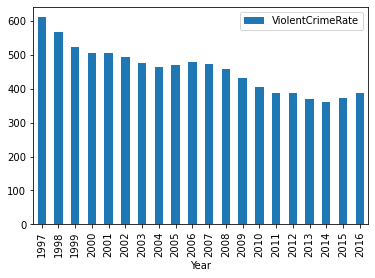

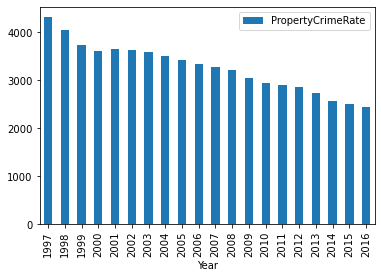

In [4]:
USCrime_df.plot.bar(x = "Year", y = "ViolentCrimeRate")
USCrime_df = USCrime_df.astype(float, errors = 'raise')
USCrime_df["Year"] = USCrime_df["Year"].astype(int, errors = 'raise')
USCrime_df.plot.bar(x = "Year", y = "PropertyCrimeRate")

By looking at the two graphs above you can see both Violent Crime and Property Crime rates have decreased since 1997. Although Property crime rates were slowly decreasing in 2006, Violent Crime rates went slightly up creating a very shallow bell curve in the graph.

In [5]:
cor = pd.crosstab( USCrime_df["PropertyCrimeRate"], USCrime_df["ViolentCrimeRate"])
column_1 = USCrime_df["PropertyCrimeRate"]
column_2 = USCrime_df["ViolentCrimeRate"]
corr = column_1.corr(column_2, method = "spearman")
print('Spearman correlation: %.3f' % corr)


Spearman correlation: 0.962


Since spearman's correlation is 0.962 which is close to 1 that means there is a strong correlation between Violent Crime Rates and Property Crime Rates.

# Correlation between Population and Arrests: A New Hypothesis

Below we will attempt to see if there is any correlation between Population and the amount of Arrests made. I hypothesize that with an increase in population, we will see a positive correlation with Arrests.

<AxesSubplot:title={'center':'Violent Crime by Year in the United States'}, xlabel='Year'>

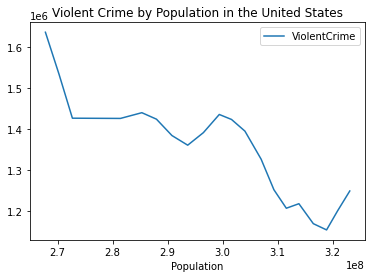

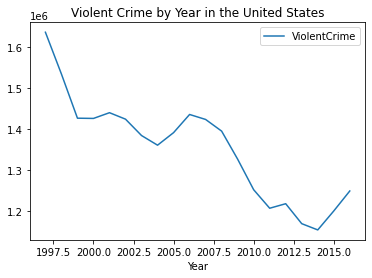

In [6]:
USCrimeR_df = USCrimeR_df.astype(int)
USCrimeR_df_dropYear = USCrimeR_df.drop(["Year"], axis=1)
USCrimeR_df_dropYear.plot(title="Violent Crime by Population in the United States", y="ViolentCrime", x="Population")

USCrimeR_df_dropPop = USCrimeR_df.drop(["Population"], axis=1)
USCrimeR_df_dropPop.plot(title="Violent Crime by Year in the United States", y="ViolentCrime", x="Year")

Here we have a line graph with the Population on the X-axis and the amount of Violent Crime arrests made on the Y-axis followed by a near exact graph below it with the Year on the X-axis and the amount of Violent Crime arrests made on the Y-axis. This is because the Population is recorded on a given Year and shows that Population increases over time and by my hypothesis so should crime, yet so far it seems that Violent Crime is on a downward trend with some anamolies.

Spearman correlation: -0.962


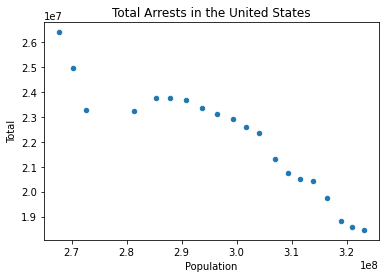

In [7]:
USCrimeR_df_dropBoth = USCrimeR_df.drop(["Population", "Year"], axis=1)
USCrimeR_df_dropBoth["Total"] = USCrimeR_df_dropBoth.sum(axis=1)
USCrimeR_df["Total"] = USCrimeR_df_dropBoth["Total"]
USCrimeR_df.plot.scatter(title="Total Arrests in the United States", y="Total", x="Population")

column_1 = USCrimeR_df["Population"]
column_2 = USCrimeR_df["Total"]
corr = column_1.corr(column_2, method='spearman')
print('Spearman correlation: %.3f' % corr)

Here, we have what appears to be definitive proof that there is a strong negative correlation (-0.962) between Population and Crime/Number of Arrests, meaning that as Population increase, number of Arrests decreases. This would imply that my hypothesis was incorrect. However...

# Part of a Larger Story: Correlation between State Population and Arrests

Country-wide correlation between Arrests and Population have been on a downward trend, but we always hear that the higher the population, the more crime there is to be expected. Perhaps we can glean more insight by looking deeper into the issue. Below we will look at correlation between State Population and Arrests.

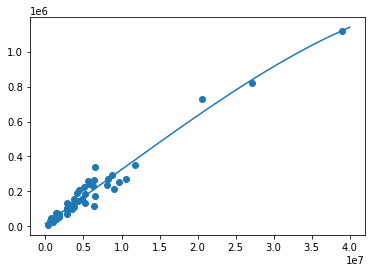

In [8]:
StateCrime_df = StateCrime_df.replace(',','', regex=True)
States_df = StateCrime_df
States_df["State"] = States_df["State"].astype('|S80')
States_df["State"] = States_df["State"].astype(str)
States_df = States_df.replace("b'",'', regex=True)
States_df = States_df.replace("'",'', regex=True)
StateCrime_df = StateCrime_df.drop("State", axis=1)
StateCrime_df = StateCrime_df.astype(int)
States_df["Total"] = States_df['Total'].astype(int)
States_df["Population"] = States_df['Population'].astype(int)

x = StateCrime_df["Population"]
y = StateCrime_df["Total"]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 40000000, 40000000)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# StateCrime_train = StateCrime_df.loc[2:42].copy()
# StateCrime_test = StateCrime_df.loc[43:52].copy()
# StateCrime_train.plot.scatter(title="Total Arrests per State", x="Population", y="Total")

# X_train = StateCrime_df[["Population"]]
# X_test = StateCrime_df[["Population"]]
# y_train = StateCrime_df["Total"]

# model = LinearRegression()
# model.fit(X=X_train, y=y_train)
# model.predict(X=X_test)
# print(model.predict(X=X_test))
# X_new = pd.DataFrame()
# # create a sequence of 200 evenly spaced numbers from 10 to 41
# X_new["Population"] = np.linspace(0, 40000000, num=200)

# # create a Series out of the predicted values
# # (trailing underscore indicates fitted values)
# y_new_ = pd.Series(
#     model.predict(X_new), # y values in Series.plot.line()
#     index=X_new["Population"]    # x values in Series.plot.line()
# )

# # plot the data, then the model
# StateCrime_train.plot.scatter(title="Total Arrests per State", x="Population", y="Total")
# y_new_.plot.line()
# print(y_new_.plot.line())

Above is a Polynomial Regression of Population (x-axis) and Arrests (y-axis) and it shows that there is actually an upward trend between arrests and population, implying that the original hypothesis is actually correct. More details on this graph below:

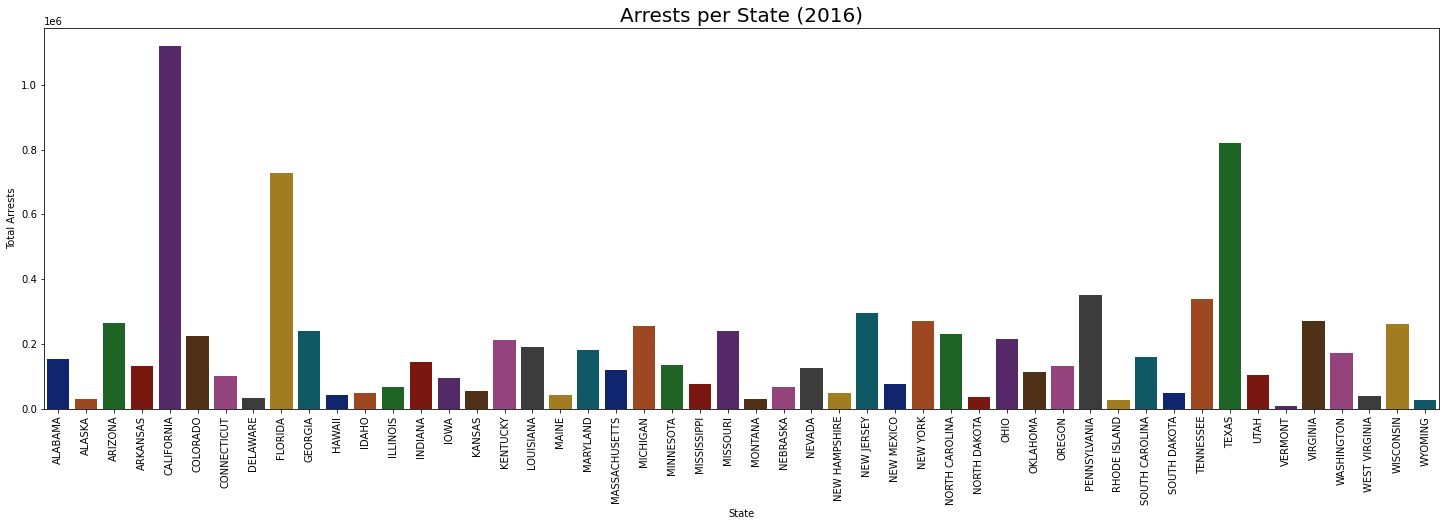

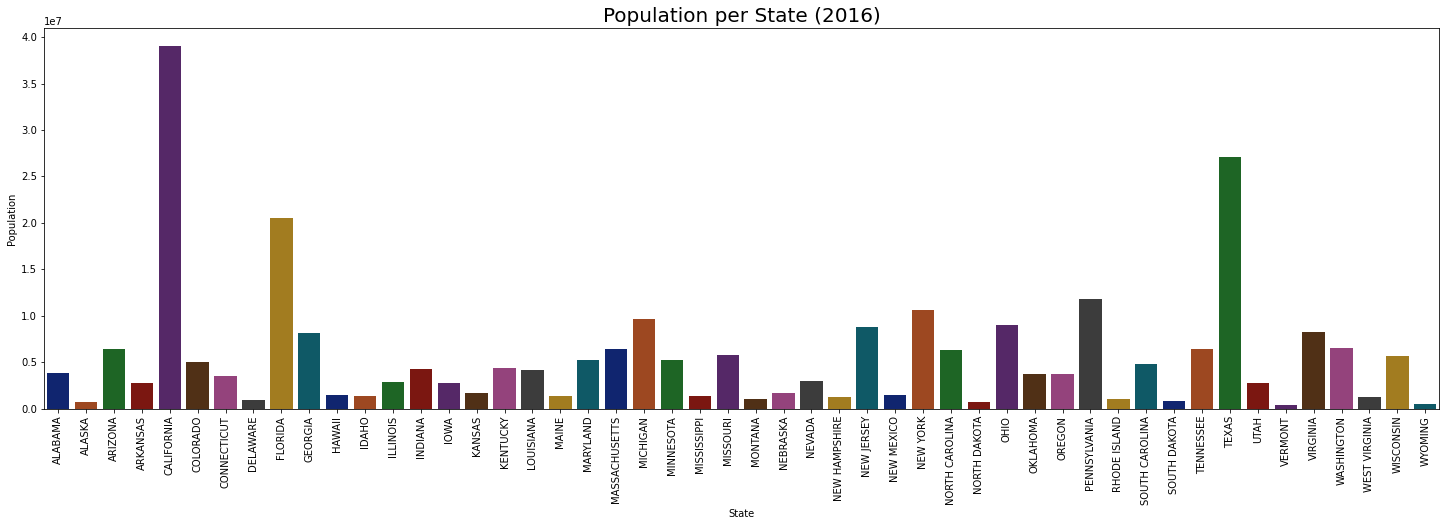

In [9]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = States_df['State'], y = States_df['Total'], palette = 'dark')
ax.set_xlabel(xlabel = 'State', fontsize = 10)
ax.set_ylabel(ylabel = 'Total Arrests', fontsize = 10)
ax.set_title(label = 'Arrests per State (2016)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = States_df['State'], y = States_df['Population'], palette = 'dark')
ax.set_xlabel(xlabel = 'State', fontsize = 10)
ax.set_ylabel(ylabel = 'Population', fontsize = 10)
ax.set_title(label = 'Population per State (2016)', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Above are 2 bar graphs to help visualize what was not shown in the Polynomial Regression. The first is the amount of Arrests made in each State. The second is the population size in each State. As we can see, the two graphs are almost identical, but careful observation shows us that these are indeed different graphs, but the ratio between crime and population is near 1:1.

In [10]:
cor = pd.crosstab( StateCrime_df["Total"], StateCrime_df["Population"])
column_1 = StateCrime_df["Total"]
column_2 = StateCrime_df["Population"]
corr = column_1.corr(column_2, method="spearman")
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.952


Lastly, the Spearman correlation shows us a strong positive correlation of 0.952.But how can there be a negative trend across the US, but a strong positive trend on the state level?

There could be many explanations, but none of which are revealed by the data. For instance, maybe as a country we are looking at a downward trend in crime in general, but population does play a role in crime. Or perhaps fewer arrests are being made nationwide. Currently, we have no way to know for sure.

## Correlation between Aggravated Assault and Burglary Rate

<AxesSubplot:xlabel='Year'>

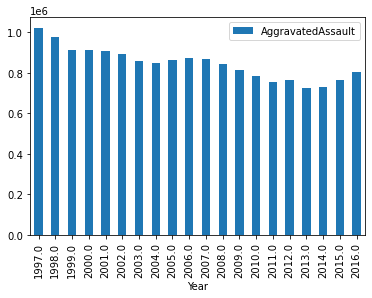

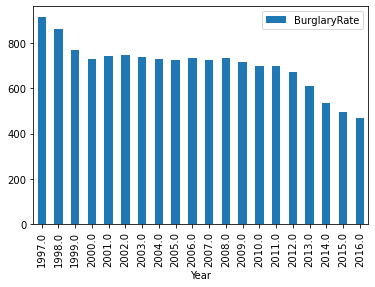

In [16]:
plt.rcParams['figure.figsize'] = (6, 4)
AA_Bur_year = USCrimeD_df[["Year", "AggravatedAssault", "BurglaryRate"]]
USCrimeD_df.plot.bar(x = "Year", y = "AggravatedAssault")
USCrimeD_df.plot.bar(x = "Year", y = "BurglaryRate")

By looking at the graph you can see that aggravated assault cases decreased from 1997 - 1999 then were a bit up and down from 1999 - 2013. Aggravated assault then started increasing 2014 onwards. Burglary rate also decreased from 1997 - 1999. However, burglary held pretty steady from 1999 - 2012. During that time you can see that burglary increases and decreases very slightly each year following the same trend as aggravated assault. The difference is that burglary rate start decreasing after 2012.

In [12]:
AA_Bur = USCrimeD_df[["AggravatedAssault", "BurglaryRate"]]
corr1 = AA_Bur.corr(method = 'spearman')
print('Spearman\'s Correlation')
corr1

Spearman's Correlation


,AggravatedAssault,BurglaryRate
AggravatedAssault,1.000000,0.873684
BurglaryRate,0.873684,1.000000


Since Spearman's correlation is 0.873684 which is close to 1 that means there is a pretty strong correlation between Aggravated Assault and Burglary Rate.
